In [ ]:
#Time Series Analysis 
#there is only one variable in this analysis - used if want to predict that particular variable (sales) with respect to time, lets say future. i.e What will be the sales in next 4 months? 
#Working with ARIMA model Auto Regressive integration(d= order of differentiation) Moving average

In [2]:
import pandas as pd #data analysis
import numpy as np #stastical analysis
import seaborn as sns #visualization
import matplotlib.pyplot as plt #plotting
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6

In [3]:
data= pd.read_csv(r'D:\CBD 3384 - project\AirPassengers.zip')
data['Month'] =pd.to_datetime(data['Month'], infer_datetime_format=True)
indexeddata =data.set_index(['Month'])

In [4]:
from datetime import datetime
indexeddata.head(5)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
from datetime import datetime
indexeddata.tail(5)

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


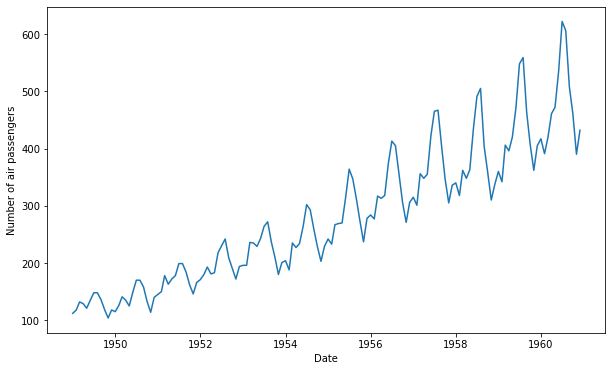

In [6]:
#plotting graph
plt.xlabel("Date")
plt.ylabel("Number of air passengers")
plt.plot(indexeddata)

In [7]:
# Checking if this data is stationary or not - from graph it is clear that data is not stationary
#There are two tests to check the stationarity that are rolling tests and ADCL test

In [8]:
#Rolling test

#Rolling mean 
rolmean = indexeddata.rolling(window=12).mean() # window =12 means , 12 months

#Rolling standard deviation
rolstd = indexeddata.rolling(window=12).std()

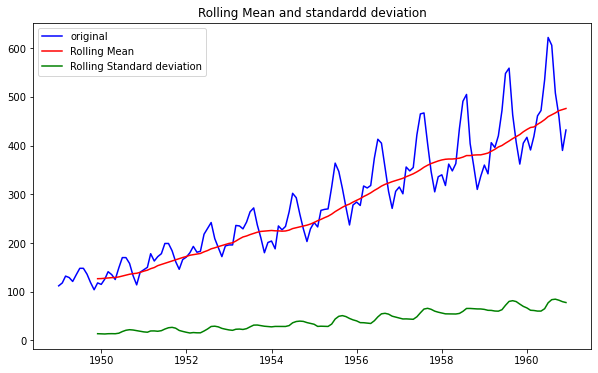

In [9]:
#Plotting rolling statistics
orig = plt.plot(indexeddata, color='blue', label='original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std =plt.plot(rolstd, color='green', label='Rolling Standard deviation')
plt.legend(loc='best')
plt.title('Rolling Mean and standard deviation')
plt.title('Rolling Mean and standardd deviation')
plt.show(block=False)

In [10]:
#inferernce from the graph : Data is not stationary

In [11]:
#Performing Dickey Fuller Test
from statsmodels.tsa.stattools import adfuller

print ('Result of Dickey-Fuller Test:')
dftest = adfuller(indexeddata['#Passengers'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags used','Number of observation used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key] = value
    
    
print(dfoutput)

Result of Dickey-Fuller Test:
Test Statistic                  0.815369
p-value                         0.991880
#Lags used                     13.000000
Number of observation used    130.000000
Critical Value (1%)            -3.481682
Critical Value (5%)            -2.884042
Critical Value (10%)           -2.578770
dtype: float64


In [12]:
#inference from the data that data is not stationary as critical value should be large than the test statistic otherwise.

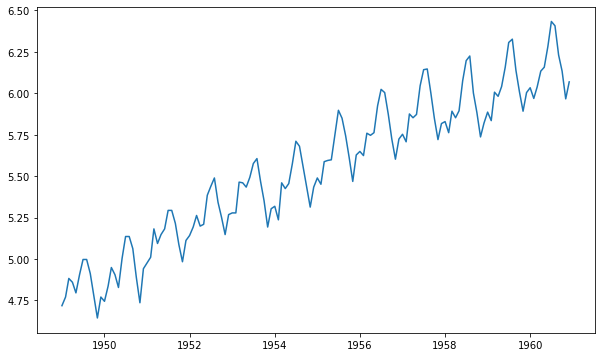

In [13]:
#Estimating Trend
indexeddata_logScale = np.log(indexeddata)# taking the log of the data 
plt.plot(indexeddata_logScale)

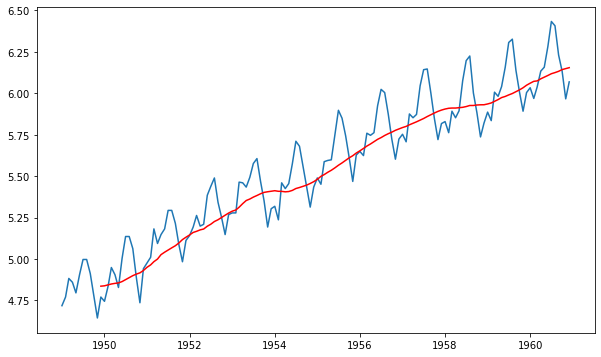

In [14]:
movingAverage = indexeddata_logScale.rolling(window=12).mean()
movingSTD = indexeddata_logScale.rolling(window=12).std()
plt.plot(indexeddata_logScale)
plt.plot(movingAverage,color='red')
#data not stationary - trend  upwards

In [15]:
#Why we are performing these transitions in order to make data stationary 
# That is why took log of data (according to data , sometimes it can be squre root , cube root , main aim is to make data stationary) which improvised the mean a bit but still it is not stationary

In [16]:
dataLogScaleMinusMovingAverage = indexeddata_logScale - movingAverage
dataLogScaleMinusMovingAverage.head(12)

#Remove Nan Values
dataLogScaleMinusMovingAverage.dropna(inplace=True)
dataLogScaleMinusMovingAverage.head(10)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [17]:
#Have to excute same function both for rolling and dickey fuller test
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determining rolling sttistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTd = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std =  plt.plot(movingSTd, color='green', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and standard deviation')
    plt.show(block=False)
    
    #Performing Dickey Fuller Test
    print ('Result of Dickey-Fuller Test:')
    dftest = adfuller(indexeddata['#Passengers'], autolag='AIC')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags used','Number of observation used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput)

        
    


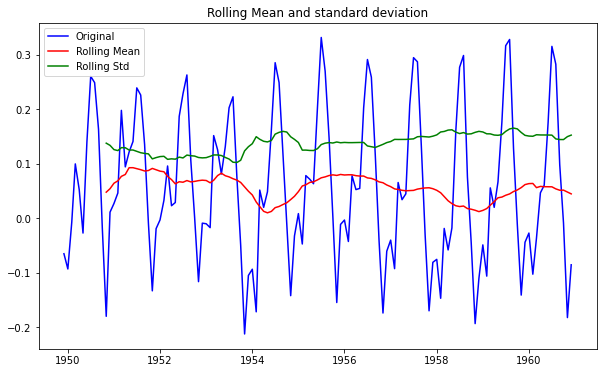

Result of Dickey-Fuller Test:
Test Statistic                  0.815369
p-value                         0.991880
#Lags used                     13.000000
Number of observation used    130.000000
Critical Value (1%)            -3.481682
Critical Value (5%)            -2.884042
Critical Value (10%)           -2.578770
dtype: float64


In [18]:
test_stationarity(dataLogScaleMinusMovingAverage)

In [19]:
#Green and red lines shows the standard mean and standard deviation which is much more stationary then before, no trend.

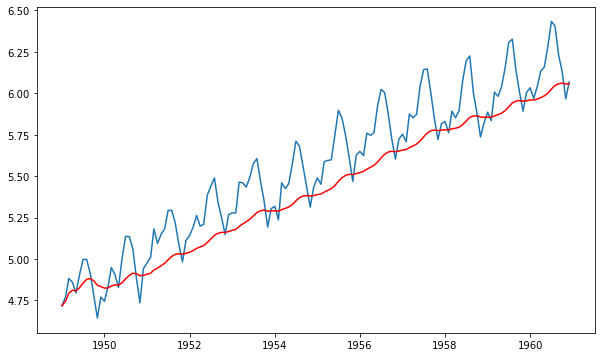

In [20]:
exponentialDecayweightedAverage =indexeddata_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexeddata_logScale)
plt.plot(exponentialDecayweightedAverage, color='red')

#It shows as the time series is progressing, the average is also progressing

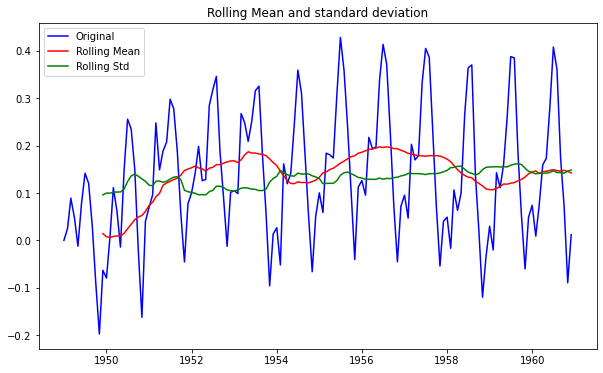

Result of Dickey-Fuller Test:
Test Statistic                  0.815369
p-value                         0.991880
#Lags used                     13.000000
Number of observation used    130.000000
Critical Value (1%)            -3.481682
Critical Value (5%)            -2.884042
Critical Value (10%)           -2.578770
dtype: float64


In [21]:
# Subtracting Weighted average from the log scale
dataLogScaleMinusMovingExponentialAverage = indexeddata_logScale - exponentialDecayweightedAverage
test_stationarity(dataLogScaleMinusMovingExponentialAverage)
#From raph it can be infered that value become more stationary , now we can use this value

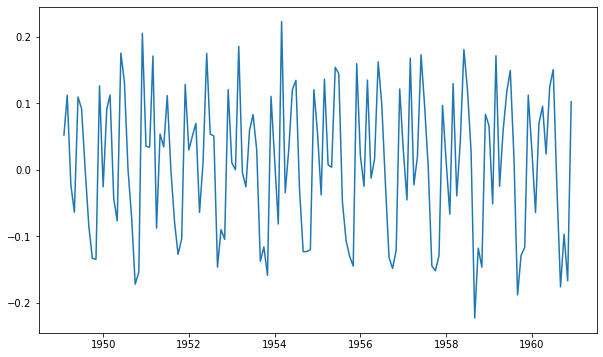

In [22]:
dataLogDiffShifting = indexeddata_logScale - indexeddata_logScale.shift()#shifting the values
plt.plot(dataLogDiffShifting)

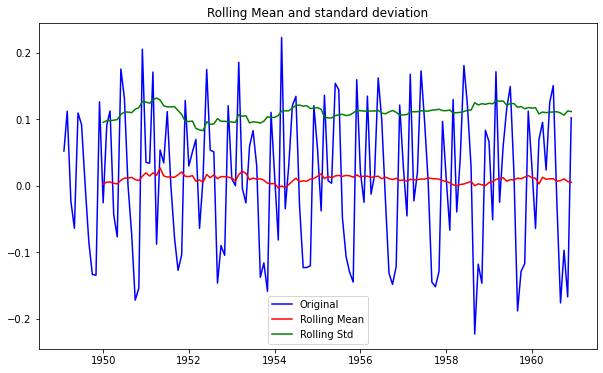

Result of Dickey-Fuller Test:
Test Statistic                  0.815369
p-value                         0.991880
#Lags used                     13.000000
Number of observation used    130.000000
Critical Value (1%)            -3.481682
Critical Value (5%)            -2.884042
Critical Value (10%)           -2.578770
dtype: float64


In [23]:
#dropping the null values
dataLogDiffShifting.dropna(inplace=True)
test_stationarity(dataLogDiffShifting)
#From graph - no trend , time series is stationary now.


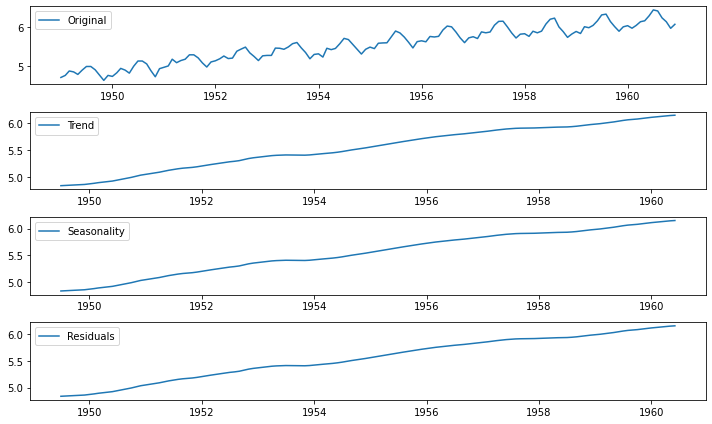

In [24]:
#Components of timeseries

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexeddata_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexeddata_logScale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(trend, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(trend, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


 

 

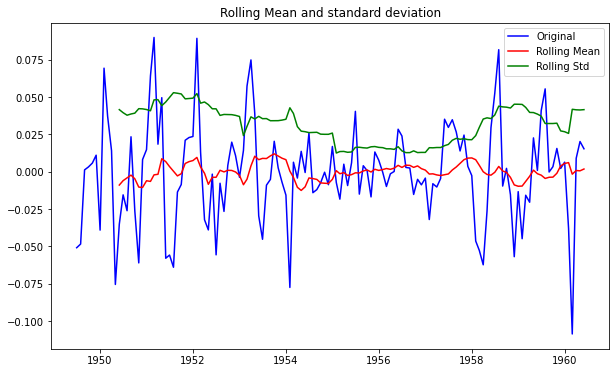

Result of Dickey-Fuller Test:
Test Statistic                  0.815369
p-value                         0.991880
#Lags used                     13.000000
Number of observation used    130.000000
Critical Value (1%)            -3.481682
Critical Value (5%)            -2.884042
Critical Value (10%)           -2.578770
dtype: float64


In [25]:

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)
 

In [26]:
#From this graph , it is clear that it is not stationary and we have to get - I - differentiation factor , so we will get teh value of d
#And also we need to get the value  of p(auto regressive lags) and q (moving average)
#So we need to plot the ACF and PACF plots , with the help of p and q values

E:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


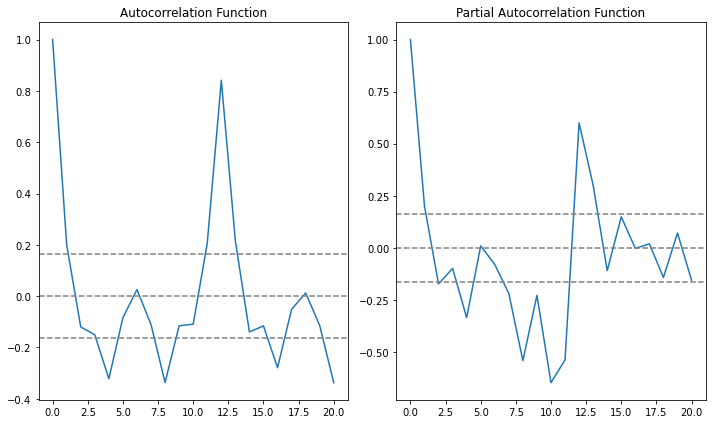

In [27]:
#Plot ACF and PACF
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(dataLogDiffShifting, nlags=20)
lag_pacf = pacf(dataLogDiffShifting, nlags=20, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(dataLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(dataLogDiffShifting)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(dataLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(dataLogDiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

#So , form the graph vlue of p nd q can be obtained p = 2 , q= 2 for AR graph And d = 1( obtained earlier time series diffrentiation)

E:\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.war

Plotting AR model


E:\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


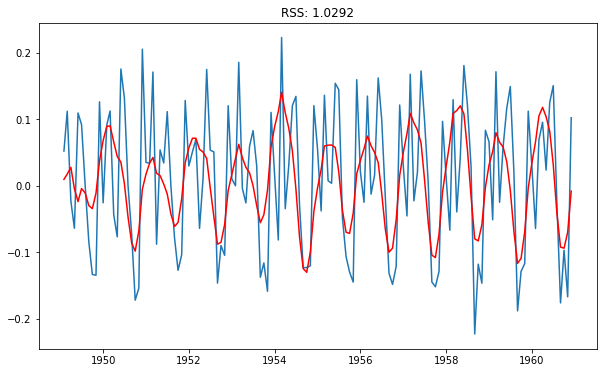

In [28]:
from statsmodels.tsa.arima_model import ARIMA
#substituting the values of p,q and d in ARIMA model

#AR Model
model = ARIMA(indexeddata_logScale, order=(2,1,2))
results_AR = model.fit(disp=-1)
plt.plot(dataLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-dataLogDiffShifting["#Passengers"])**2))
print('Plotting AR model')

E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Plotting MA model


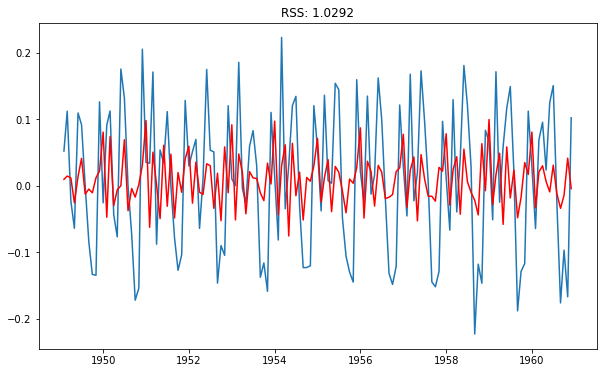

In [29]:
#NA Model
model = ARIMA(indexeddata_logScale, order=(0,1,2))
results_MA = model.fit(disp=-1)
plt.plot(dataLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-dataLogDiffShifting["#Passengers"])**2))
print('Plotting MA model')

E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
E:\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 

Text(0.5, 1.0, 'RSS: 1.0292')

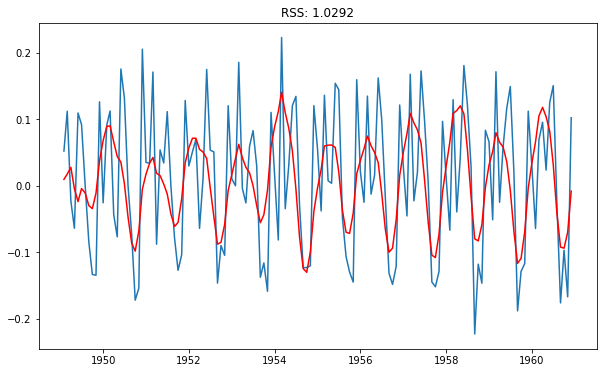

In [30]:
#ARIMA model - combining AR and MA
model = ARIMA(indexeddata_logScale, order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(dataLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f' %sum((results_ARIMA.fittedvalues-dataLogDiffShifting["#Passengers"])**2))

In [31]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [32]:
#Converting to Comulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [36]:
predictions_ARIMA_log = pd.Series(indexeddata_logScale['#Passengers'].iloc[0], index=indexeddata_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

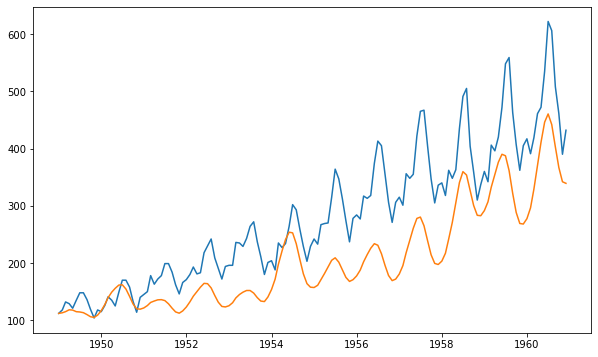

In [37]:
predictions_ARIMA= np.exp(predictions_ARIMA_log)
plt.plot(indexeddata)
plt.plot(predictions_ARIMA) #How our model fits to the original data
#It can be seen from the graph :It fits pretty well , orange line is model and blue if original

In [38]:
indexeddata_logScale

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


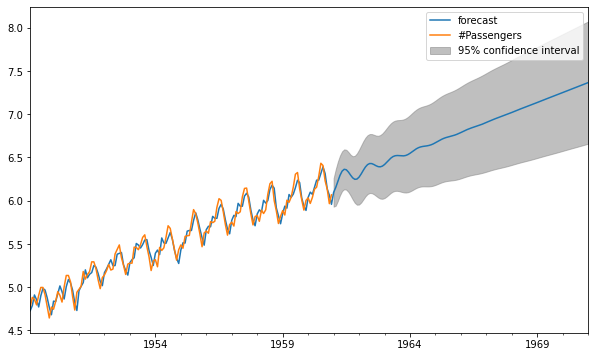

In [39]:
#Predicting for next 10 years, so that will be 120*10 
results_ARIMA.plot_predict(1,264)
x=results_ARIMA.forecast(steps=120)

In [40]:
results_ARIMA.forecast(steps=120)

(array([6.09553388, 6.15281398, 6.22442963, 6.29241103, 6.34164724,
        6.36359373, 6.35784698, 6.33139314, 6.29597544, 6.26447712,
        6.24738319, 6.25025163, 6.2727583 , 6.30940312, 6.35151501,
        6.38988671, 6.41727402, 6.43011076, 6.42906708, 6.41842501,
        6.4045616 , 6.39403614, 6.39183078, 6.400195  , 6.41833693,
        6.44295416, 6.46937452, 6.49294009, 6.51024145, 6.51989059,
        6.522676  , 6.52112402, 6.51864536, 6.51853694, 6.52311926,
        6.53322366, 6.5481288 , 6.56591574, 6.58410332, 6.60036567,
        6.61313295, 6.62192808, 6.62737812, 6.63093148, 6.63438704,
        6.63937998, 6.64696518, 6.65739856, 6.67015344, 6.68414275,
        6.69806654, 6.71077932, 6.72157763, 6.73034013, 6.73749838,
        6.74386403, 6.75037345, 6.75782614, 6.76668704, 6.77699847,
        6.78841346, 6.80032884, 6.81207227, 6.82308794, 6.8330717 ,
        6.84202526, 6.85022344, 6.85811251, 6.86617369, 6.8747918 ,
        6.88416333, 6.89426416, 6.90487923, 6.91